<a href="https://colab.research.google.com/github/gatreddi/python-with-Gen-AI-Machine-leaning-/blob/main/task_4(introduction_to_deep_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load handwritten digits dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten 28x28 images into 784-sized vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


In [4]:
# Build a simple neural network
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# Train for 5 epochs
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8791 - loss: 0.4241 - val_accuracy: 0.9590 - val_loss: 0.1342
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9655 - loss: 0.1129 - val_accuracy: 0.9665 - val_loss: 0.1027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9777 - loss: 0.0731 - val_accuracy: 0.9769 - val_loss: 0.0744
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9834 - loss: 0.0533 - val_accuracy: 0.9751 - val_loss: 0.0771
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9879 - loss: 0.0374 - val_accuracy: 0.9719 - val_loss: 0.0909


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1116
Test accuracy: 0.9719


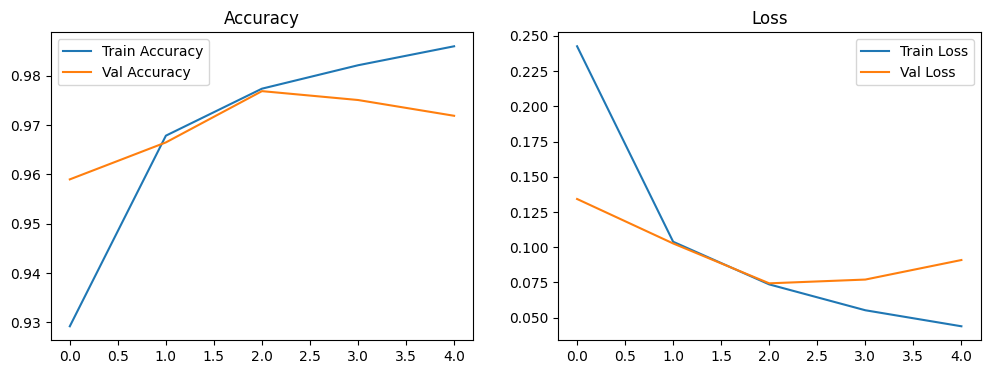

In [7]:
# Evaluate performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training/validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


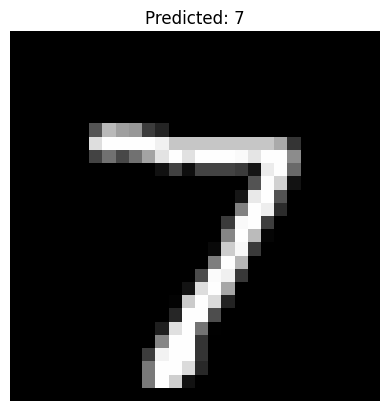

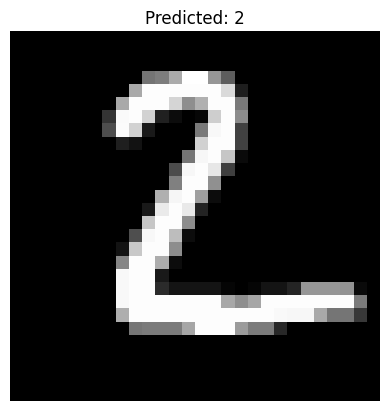

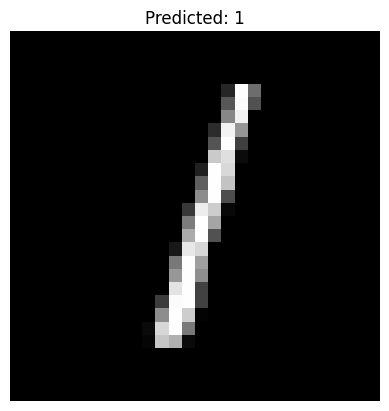

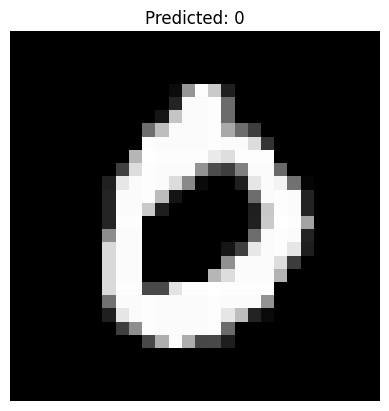

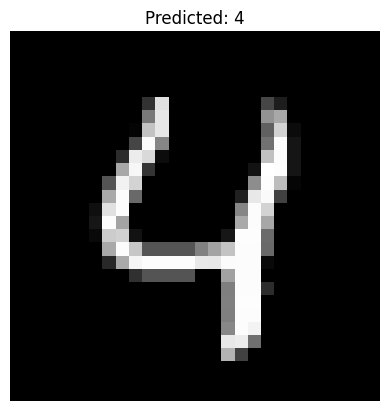

In [8]:
import numpy as np

# Predict on test data
predictions = model.predict(x_test)

# Show first 5 test images with predicted labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
